# MolPCBA Visualisation

Before running this notebook, make sure to forst run the `OGBG-MolPCBA_inspecting.ipynb` notebook, and then the `OGBG-MolPCBA_dataset.ipynb` after that, both with the same `PROTEIN_NR` value. This will generate the necessary files for this notebook. The other two files have the `PROTEIN_NR` set to `349519` for the ablation study, so the value has to be changed and the files rerun before running this notebook.


In [1]:
import pandas as pd
import ast
from matplotlib.lines import Line2D
from ogb.graphproppred import GraphPropPredDataset
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
"""Parameters to set:"""
PROTEIN_NR = 182987

prototypes = [159, 272]

reference_groups = {
    159: [159, 158, 160, 156, 163, 162, 161, 164, 155, 157],
    272: [272, 274, 273, 264, 263, 265, 275, 278, 261, 279, 266, 276, 277]
}
subgroups = {
    159: [159, 158, 160, 156],
    272: [272, 274, 273, 264, 263]
}

In [3]:
dataset = GraphPropPredDataset(root= './data/OGBG' ,name = "ogbg-molpcba")

split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]

In [4]:
graph, label = dataset[PROTEIN_NR]

num_nodes_list = [(i, dataset[i][0]['num_nodes']) for i in range(len(dataset))]

num_nodes_list.sort(key=lambda x: x[1], reverse=True)

top_5_graphs = num_nodes_list[:120]

for idx, num_nodes in top_5_graphs:
    print(f"Graph index: {idx}, Number of nodes: {num_nodes}")

Graph index: 349519, Number of nodes: 332
Graph index: 17365, Number of nodes: 331
Graph index: 302589, Number of nodes: 322
Graph index: 346969, Number of nodes: 313
Graph index: 182987, Number of nodes: 311
Graph index: 390365, Number of nodes: 309
Graph index: 349517, Number of nodes: 304
Graph index: 104782, Number of nodes: 303
Graph index: 17363, Number of nodes: 302
Graph index: 272369, Number of nodes: 302
Graph index: 274645, Number of nodes: 302
Graph index: 363468, Number of nodes: 301
Graph index: 296001, Number of nodes: 300
Graph index: 349523, Number of nodes: 300
Graph index: 272370, Number of nodes: 294
Graph index: 37503, Number of nodes: 290
Graph index: 46677, Number of nodes: 287
Graph index: 321265, Number of nodes: 285
Graph index: 17368, Number of nodes: 284
Graph index: 200269, Number of nodes: 284
Graph index: 351095, Number of nodes: 283
Graph index: 403909, Number of nodes: 281
Graph index: 389796, Number of nodes: 277
Graph index: 361070, Number of nodes: 2

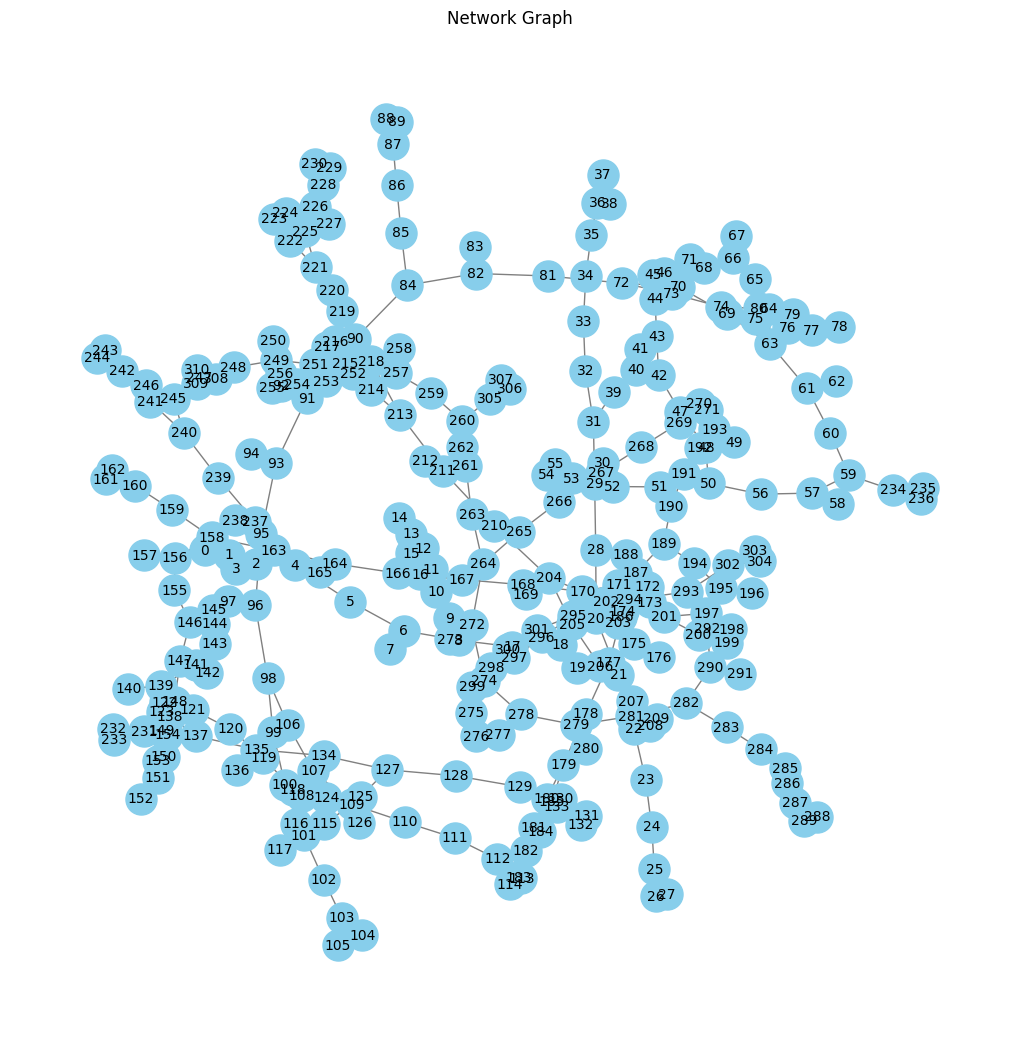

In [5]:
graph, _ = dataset[PROTEIN_NR]

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']

G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Network Graph")
plt.show()

In [6]:
graph, label = dataset[PROTEIN_NR]

In [7]:
edge_index = graph['edge_index']
num_nodes = graph['num_nodes']
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

In [8]:
results = pd.read_csv(f'subgroups_graph_{PROTEIN_NR}_OGBG.csv')

In [9]:
results

,Unnamed: 0,Prototype,Rho,Sigma,Q,Ranks
0,202,202,14,5,0.230508,"[(202, False), (201, True), (203, True), (204,..."
1,272,272,13,5,0.228987,"[(272, False), (274, True), (273, True), (264,..."
2,237,237,13,5,0.228987,"[(237, False), (239, True), (238, True), (4, F..."
3,159,159,19,4,0.217341,"[(159, False), (158, False), (160, False), (15..."
4,259,259,11,7,0.207201,"[(259, True), (257, False), (260, False), (261..."
5,247,247,11,7,0.207201,"[(247, True), (245, False), (248, False), (249..."
6,138,138,11,7,0.207201,"[(138, True), (139, False), (137, False), (135..."
7,60,60,11,7,0.207201,"[(60, True), (61, False), (59, False), (57, Fa..."
8,268,268,5,3,0.206559,"[(268, True), (269, False), (267, False), (270..."
9,35,35,5,3,0.206559,"[(35, True), (36, False), (34, False), (37, Tr..."


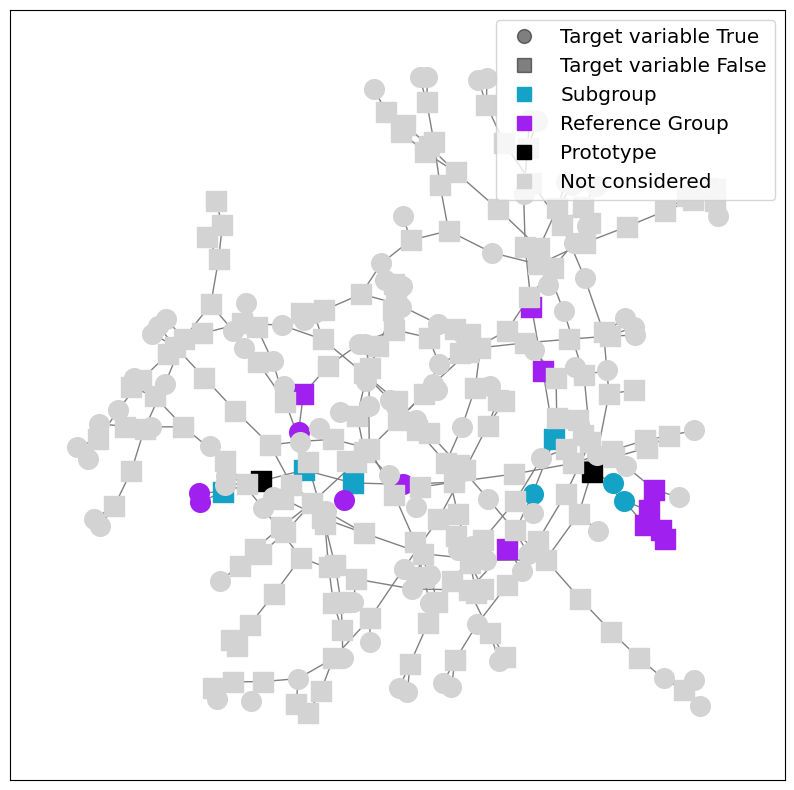

In [10]:
def get_node_status(node, prototype):
    index_prototype = results[results['Unnamed: 0'] == prototype].index[0]
    ranks_list = ast.literal_eval(results['Ranks'][index_prototype])
    for rank_node, status in ranks_list:
        if rank_node == node:
            return status

prototype_nodes_true = []
prototype_nodes_false = []
subgroup_nodes_true = []
subgroup_nodes_false = []
reference_group_nodes_true = []
reference_group_nodes_false = []
the_rest_nodes = set(G.nodes())

for prototype in prototypes:
    prototype_nodes = [node for node in G.nodes() if node == prototype]
    prototype_nodes_true.extend([node for node in prototype_nodes if get_node_status(node, prototype)])
    prototype_nodes_false.extend([node for node in prototype_nodes if not get_node_status(node, prototype)])

    subgroup_nodes = [node for node in subgroups[prototype] if node != prototype]
    subgroup_nodes_true.extend([node for node in subgroup_nodes if get_node_status(node, prototype)])
    subgroup_nodes_false.extend([node for node in subgroup_nodes if not get_node_status(node, prototype)])

    reference_group_nodes = [node for node in reference_groups[prototype] if node not in subgroups[prototype] and node != prototype]
    reference_group_nodes_true.extend([node for node in reference_group_nodes if get_node_status(node, prototype)])
    reference_group_nodes_false.extend([node for node in reference_group_nodes if not get_node_status(node, prototype)])

    the_rest_nodes -= set(reference_groups[prototype])
    the_rest_nodes -= {prototype}

the_rest_group_nodes_true = [node for node in the_rest_nodes if get_node_status(node, prototype)]
the_rest_group_nodes_false = [node for node in the_rest_nodes if not get_node_status(node, prototype)]

plt.figure(figsize=(10, 10))
position = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=position, edge_color='gray')

nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_true, node_color='#000000', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_false, node_color='#000000', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_true, node_color='#14a3c7', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_false, node_color='#14a3c7', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_true, node_color='#A020F0', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_false, node_color='#A020F0', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_true, node_color='lightgray', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=the_rest_group_nodes_false, node_color='lightgray', node_shape='s', node_size=200)

circle_marker = Line2D([0], [0], marker='o', color='black', label='Target variable True', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)
square_marker = Line2D([0], [0], marker='s', color='black', label='Target variable False', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)

prototype_marker = Line2D([0], [0], marker='s', color='#000000', label='Prototype', markersize=10, linestyle='None', markerfacecolor='#000000', alpha=1)
subgroup_marker = Line2D([0], [0], marker='s', color='#14a3c7', label='Subgroup', markersize=10, linestyle='None', markerfacecolor='#14a3c7', alpha=1)
reference_marker = Line2D([0], [0], marker='s', color='#A020F0', label='Reference Group', markersize=10, linestyle='None', markerfacecolor='#A020F0', alpha=1)
the_rest_marker = Line2D([0], [0], marker='s', color='lightgray', label='Not considered', markersize=10, linestyle='None', markerfacecolor='lightgray', alpha=1)

plt.legend(handles=[circle_marker, square_marker, subgroup_marker, reference_marker, prototype_marker, the_rest_marker], loc='upper right', fontsize='x-large')

plt.show()